# Ensemble Prediction Model

In [51]:
## Data Analysis Phase
## MAin aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [52]:
df1=pd.read_csv(r'TrainingData.csv')
df2_testdata = pd.read_csv(r'TestData.csv')
## print shape of dataset with rows and columns
print(df1.shape,df2_testdata.shape)

(999, 39) (5, 39)


In [53]:
frames = [df1, df2_testdata]
df = pd.concat(frames,ignore_index=True, sort=False, axis = 0)

In [54]:
df.shape

(1004, 39)

In [55]:
# ** Filling Missing values

In [56]:
df.columns

Index(['Period', 'EQ', 'Social_Search_Impressions',
       'Social_Search_Working_cost', 'Digital_Impressions',
       'Digital_Working_cost', 'Print_Impressions.Ads40',
       'Print_Working_Cost.Ads50', 'OOH_Impressions', 'OOH_Working_Cost',
       'SOS_pct', 'Digital_Impressions_pct', 'CCFOT', 'Median_Temp',
       'Median_Rainfall', 'Fuel_Price', 'Inflation', 'Trade_Invest',
       'Brand_Equity', 'Avg_EQ_Price', 'Any_Promo_pct_ACV', 'Any_Feat_pct_ACV',
       'Any_Disp_pct_ACV', 'EQ_Base_Price', 'Est_ACV_Selling', 'pct_ACV',
       'Avg_no_of_Items', 'pct_PromoMarketDollars_Category', 'RPI_Category',
       'Magazine_Impressions_pct', 'TV_GRP', 'Competitor1_RPI',
       'Competitor2_RPI', 'Competitor3_RPI', 'Competitor4_RPI', 'EQ_Category',
       'EQ_Subcategory', 'pct_PromoMarketDollars_Subcategory',
       'RPI_Subcategory'],
      dtype='object')

In [57]:

periods=df.Period.str.split('-').apply(pd.Series)
periods.columns=['Year','PeriodNo']
periods.PeriodNo=periods.PeriodNo.str.replace('Period:','')
df=pd.concat([periods,df],axis=1)
df.drop(['Period'],axis=1,inplace=True)

In [58]:
df.head()

,Year,PeriodNo,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,Digital_Impressions_pct,CCFOT,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Brand_Equity,Avg_EQ_Price,Any_Promo_pct_ACV,Any_Feat_pct_ACV,Any_Disp_pct_ACV,EQ_Base_Price,Est_ACV_Selling,pct_ACV,Avg_no_of_Items,pct_PromoMarketDollars_Category,RPI_Category,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,2016,1,504.784933,NaN,NaN,37148.2,2045.282,NaN,NaN,NaN,NaN,7.446883,NaN,100.0,32.950,0.5150,8.226,0.013258,42744.25684,42.410000,49.091447,9.691794,NaN,1.688896,1.427532,8.696588e+09,39.441025,2.611782,0.0339,35.817030,NaN,NaN,97.173365,35.557371,44.502717,63.377268,1728388.673,331927.5394,0.162732,40.560563
1,2016,2,490.226477,NaN,NaN,50886.8,2370.584,0.000014,0.000015,NaN,NaN,11.677082,NaN,87.5,34.625,0.2700,7.473,0.009938,36290.43956,42.410000,49.057612,9.415938,NaN,1.687952,1.442716,8.682307e+09,38.417224,2.522814,0.0391,36.389065,NaN,NaN,97.850760,37.223072,45.720077,62.731742,1900859.879,334611.3806,0.231650,40.046301
2,2016,3,479.244686,NaN,NaN,253333.2,3180.888,0.000016,0.000017,NaN,NaN,0.102858,NaN,96.0,46.700,0.3900,8.001,0.007832,34852.14166,42.410000,49.367514,5.176684,NaN,NaN,1.423408,8.706898e+09,36.499442,2.477322,0.0228,36.599984,NaN,NaN,96.397739,40.800563,41.822953,62.090417,2036436.906,387148.3582,0.125394,40.411115
3,2016,4,489.057428,NaN,NaN,3426239.0,13595.398,0.000016,0.000019,NaN,NaN,0.249055,NaN,100.0,49.650,0.3500,8.767,0.010034,24869.55899,43.543571,50.657634,6.088273,NaN,NaN,1.443401,8.660289e+09,38.135159,2.520409,0.0147,38.201852,NaN,NaN,98.936519,36.576140,41.578429,63.374358,2113635.013,482489.6740,0.056603,42.213246
4,2016,5,477.031994,NaN,NaN,552197.8,3983.134,0.000016,0.000019,NaN,NaN,13.338804,NaN,100.0,58.100,0.5025,9.277,0.009546,61675.32162,43.790000,50.625777,7.827112,NaN,0.170731,1.473687,8.644519e+09,38.629564,2.497285,0.0219,38.648805,31.702433,25.3,100.509969,36.032016,42.602412,63.291934,2402211.102,629826.6484,0.065059,43.345578


In [59]:
print(df.shape)
print(df.isna().sum()[df.isna().sum()>17])

(1004, 40)
Year                                  965
PeriodNo                              965
EQ                                    965
Social_Search_Impressions             975
Social_Search_Working_cost            975
Digital_Impressions                   978
Digital_Working_cost                  979
Print_Impressions.Ads40               966
Print_Working_Cost.Ads50              966
OOH_Impressions                       992
OOH_Working_Cost                      995
SOS_pct                               965
Digital_Impressions_pct               991
CCFOT                                 965
Median_Temp                           965
Median_Rainfall                       965
Fuel_Price                            965
Inflation                             965
Trade_Invest                          965
Brand_Equity                          965
Avg_EQ_Price                          965
Any_Promo_pct_ACV                     965
Any_Feat_pct_ACV                      992
Any_Disp_pct_ACV       

In [60]:
df.isna().sum()[df.isna().sum()>0]

Year                                  965
PeriodNo                              965
EQ                                    965
Social_Search_Impressions             975
Social_Search_Working_cost            975
Digital_Impressions                   978
Digital_Working_cost                  979
Print_Impressions.Ads40               966
Print_Working_Cost.Ads50              966
OOH_Impressions                       992
OOH_Working_Cost                      995
SOS_pct                               965
Digital_Impressions_pct               991
CCFOT                                 965
Median_Temp                           965
Median_Rainfall                       965
Fuel_Price                            965
Inflation                             965
Trade_Invest                          965
Brand_Equity                          965
Avg_EQ_Price                          965
Any_Promo_pct_ACV                     965
Any_Feat_pct_ACV                      992
Any_Disp_pct_ACV                  

For columns which are having more the 50% of records as null, we are dropping the columns as imputing such data with hamper the model further.

In [61]:
df.drop(['OOH_Impressions','OOH_Working_Cost','Digital_Impressions_pct','Any_Feat_pct_ACV','Magazine_Impressions_pct','TV_GRP'],axis=1,inplace=True)

In [62]:
# PeriodNo,Year contained NaN
df = df[~df['PeriodNo'].isnull()]
df = df[~df['Year'].isnull()]


In [63]:
df.Social_Search_Impressions=df.Social_Search_Impressions.fillna(df.Social_Search_Impressions.mean())
df.Social_Search_Working_cost=df.Social_Search_Working_cost.fillna(df.Social_Search_Working_cost.mean())
df.Digital_Impressions=df.Digital_Impressions.fillna(df.Digital_Impressions.mean())
df.Digital_Working_cost=df.Digital_Working_cost.fillna(df.Digital_Working_cost.mean())
df.Any_Disp_pct_ACV=df.Any_Disp_pct_ACV.fillna(df.Any_Disp_pct_ACV.mean())
df['Print_Impressions.Ads40']=df['Print_Impressions.Ads40'].fillna(df['Print_Impressions.Ads40'].mean())
df['Print_Working_Cost.Ads50']=df['Print_Working_Cost.Ads50'].fillna(df['Print_Working_Cost.Ads50'].mean())
df.PeriodNo=df.PeriodNo.apply(int)
df[['PeriodNo']] = df[['PeriodNo']].astype(int)
df[['Year']] = df[['Year']].astype(int)
df_pred=df[['Year','PeriodNo','EQ']]

We will replace the missing values with mean for the respective columns

In [64]:
df2=pd.concat([df,pd.get_dummies(df.PeriodNo,prefix='PN')],axis=1)

In [65]:
y=df2['EQ'].values
X=df2.drop(['EQ','Year'],axis=1).values
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_std=ss.fit_transform(X)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_std,y,test_size=0.20,random_state=0)

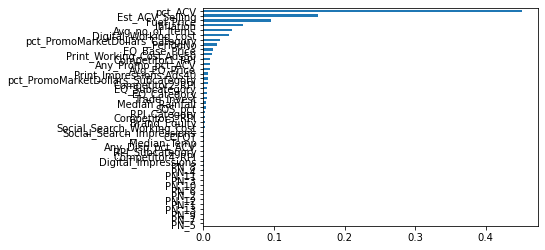

In [66]:
y=df2['EQ']
X=df2.drop(['EQ','Year'],axis=1)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rfr=RandomForestRegressor(n_estimators=100)
rfr.fit(X,y)
import matplotlib.pyplot as plt
feat_importances = pd.Series(rfr.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh')
plt.show()

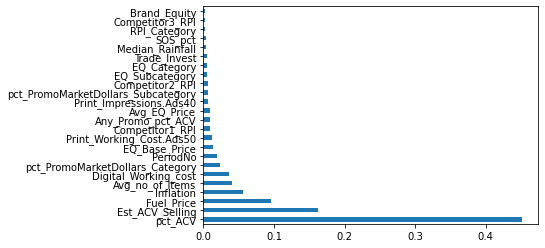

In [67]:
feat_importances.nlargest(24).plot(kind='barh')

In [68]:
df_featured=df[feat_importances.sort_values(ascending=False)[:24].index.to_list()+['EQ']]

In [69]:
y=df_featured['EQ']
X=df_featured.drop(['EQ'],axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25,random_state=0)

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import regression
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {#'loss':['ls', 'lad', 'huber', 'quantile'],
                  'max_depth': [3,4], 
                  #'min_samples_split': [2,4,6,8],
                  #'min_samples_leaf':[2,4,6,8],
                  'n_estimators':[150,175,200],
                  'learning_rate':[round(x,3) for x in np.arange(0.01,0.5,0.05)]
                 }
grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=3,verbose=1,n_jobs=2)
grid_search.fit(X, y)
y_true, y_pred = y, grid_search.predict(X)
regression.mean_squared_error(y_true, y_pred)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  58 tasks      | elapsed:    4.6s
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:    9.1s finished


9.939950139727205e-08

In [71]:
grid_search.best_params_

{'learning_rate': 0.26, 'max_depth': 3, 'n_estimators': 175}

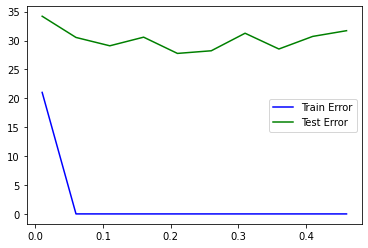

In [72]:
from sklearn.ensemble import GradientBoostingRegressor

lr_list = [x for x in np.arange(0.01,0.5,0.05)]
plt_data={'learning_rate':[],'lin_rmse_train':[],'lin_rmse_test':[]}
for learning_rate in lr_list:
    gbmr = GradientBoostingRegressor(n_estimators=175, learning_rate=learning_rate, random_state=0,max_depth=4)
    gbmr.fit(xtrain, ytrain)
    pred_train=gbmr.predict(xtrain)
    pred_test=gbmr.predict(xtest)
    plt_data['learning_rate'].append(learning_rate)
    plt_data['lin_rmse_train'].append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    plt_data['lin_rmse_test'].append(np.sqrt(mean_squared_error(ytest,pred_test)))
plt_data=pd.DataFrame(plt_data)
plt.plot(plt_data.learning_rate,plt_data.lin_rmse_train,'blue',label='Train Error')
plt.plot(plt_data.learning_rate,plt_data.lin_rmse_test,'green',label='Test Error')
plt.legend()